In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances

# DBSCAN Clustering for Data Analysis
   

## Read Data

In [14]:
# read data as dataframe from csv file
df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_22484\1127482945.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
b'Skipping line 78700: expected 20 fields, saw 21\nSkipping line 85033: expected 20 fields, saw 21\n'
b'Skipping line 128092: expected 20 fields, saw 22\n'
b'Skipping line 197000: expected 20 fields, saw 21\nSkipping line 218421: expected 20 fields, saw 21\n'
b'Skipping line 330474: expected 20 fields, saw 21\nSkipping line 337681: expected 20 fields, saw 21\n'
b'Skipping line 556266: expected 20 fields, saw 21\n'
b'Skipping line 641092: expected 20 fields, saw 21\n'
b'Skipping line 759119: expected 20 fields, saw 21\n'
b'Skipping line 801997: expected 20 fields, saw 22\n'
b'Skipping line 823248: expected 20 fields, saw 21\n'
b'Skipping line 1044981: expected 20 fields, saw 21\n'
b'Skipping line 1138871: 

In [15]:
#print siza of the data
print(df.shape)

(1900333, 20)


In [16]:
#drop half of the data
df = df.sample(frac=0.15)
print(df.shape)

(285050, 20)


In [17]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
746547,Mundiapolis Community,com.graduway.mundiapoliscommunity,Education,0.0,0,50+,50,73,True,0.0,16000000,5.1 and up,Graduway,support@graduway.com,"Nov 2, 2020","May 15, 2021",Teen,False,False,False
698841,ALMA MISIONERA,com.AlmaMisionera,Music & Audio,0.0,0,100+,100,186,True,0.0,8.1000000,4.1 and up,Cuervo HosT,juangonzalezhdradio@gmil.com,"Oct 5, 2019","Oct 05, 2019",Everyone,False,False,False
1815089,Racing in Crimea Bridge,ru.urappsstudio.racingincrimeabridge,Racing,3.7,6,500+,500,679,True,0.0,49000000,4.1 and up,URApps Studio,evolutiontouchgames@gmail.com,"Oct 26, 2018","Oct 26, 2018",Everyone,True,False,False
1314115,Metre per Second - partner,com.mps.mpsb2b,Business,4.1,13,100+,100,234,True,0.0,5.8000000,4.0.3 and up,Metre Per Second,help@servicesforsure.com,"Sep 1, 2016","Oct 16, 2017",Everyone,False,False,False
81454,Change38,net.appmodule.change38,Productivity,4.9,7,100+,100,145,True,0.0,7.0000000,4.1 and up,In Situ Energy AG,support@change38.ch,"Dec 22, 2016","Apr 28, 2017",Everyone,False,False,False
1742673,Online Job Apply - Sri Lanka,io.ionic.prog5da5f1b2fe904e7d8bc70bc3,Finance,0.0,0,"1,000+",1000,1528,True,0.0,4.3000000,4.4 and up,Digital Makers Private Limited,decemberlabs50@gmail.com,"Nov 6, 2019","Nov 06, 2019",Everyone,False,False,False
1402040,"\אגרת הרמב\""\""ן\""""",com.shaigerbi.egeretharamban,Books & Reference,0.0,0,100+,100,167,True,0.0,2.6000000,4.1 and up,Shai Gerbi,ShaiGerbiApps@gmail.com,"Apr 22, 2019","Aug 07, 2020",Everyone,True,False,False
657633,Tulip Interfaces Player,co.tulip.player,Productivity,0.0,0,500+,500,706,True,0.0,4.4000000,5.1 and up,"Tulip Interfaces, Inc.",support@tulip.co,"Apr 20, 2020","May 21, 2020",Everyone,False,False,False
1317500,Breezie Video Call,com.breezie.apps.video.VideoCall,Productivity,0.0,0,10+,10,11,True,0.0,28000000,5.0 and up,That Device Company Ltd,help@breezie.com,"Jul 9, 2019","Jun 30, 2020",Teen,False,False,False
1230205,MELTRI Toko Alat Teknik,com.meltri.android,Shopping,4.1,31,"1,000+",1000,4590,True,0.0,8.5000000,4.1 and up,Meltri,admin@meltri.com,"Oct 28, 2017","Mar 23, 2021",Everyone,False,False,False


### Clean Data

In [18]:
df=convert_to_numeric(df)
df.head(10)

e:\fourth year\second term\big data\project\XL-Data\DataAnalysis\Clustering\utils.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
746547,Mundiapolis Community,com.graduway.mundiapoliscommunity,Education,0.0,0,50.0,50,73,True,0.0,16.000000,5.1,Graduway,support@graduway.com,"Nov 2, 2020","May 15, 2021",Teen,False,False,False
698841,ALMA MISIONERA,com.AlmaMisionera,Music & Audio,0.0,0,100.0,100,186,True,0.0,0.000008,4.1,Cuervo HosT,juangonzalezhdradio@gmil.com,"Oct 5, 2019","Oct 05, 2019",Everyone,False,False,False
1815089,Racing in Crimea Bridge,ru.urappsstudio.racingincrimeabridge,Racing,3.7,6,500.0,500,679,True,0.0,49.000000,4.1,URApps Studio,evolutiontouchgames@gmail.com,"Oct 26, 2018","Oct 26, 2018",Everyone,True,False,False
1314115,Metre per Second - partner,com.mps.mpsb2b,Business,4.1,13,100.0,100,234,True,0.0,0.000006,4.0.3,Metre Per Second,help@servicesforsure.com,"Sep 1, 2016","Oct 16, 2017",Everyone,False,False,False
81454,Change38,net.appmodule.change38,Productivity,4.9,7,100.0,100,145,True,0.0,0.000007,4.1,In Situ Energy AG,support@change38.ch,"Dec 22, 2016","Apr 28, 2017",Everyone,False,False,False
1742673,Online Job Apply - Sri Lanka,io.ionic.prog5da5f1b2fe904e7d8bc70bc3,Finance,0.0,0,1000.0,1000,1528,True,0.0,0.000004,4.4,Digital Makers Private Limited,decemberlabs50@gmail.com,"Nov 6, 2019","Nov 06, 2019",Everyone,False,False,False
1402040,"\אגרת הרמב\""\""ן\""""",com.shaigerbi.egeretharamban,Books & Reference,0.0,0,100.0,100,167,True,0.0,0.000003,4.1,Shai Gerbi,ShaiGerbiApps@gmail.com,"Apr 22, 2019","Aug 07, 2020",Everyone,True,False,False
657633,Tulip Interfaces Player,co.tulip.player,Productivity,0.0,0,500.0,500,706,True,0.0,0.000004,5.1,"Tulip Interfaces, Inc.",support@tulip.co,"Apr 20, 2020","May 21, 2020",Everyone,False,False,False
1317500,Breezie Video Call,com.breezie.apps.video.VideoCall,Productivity,0.0,0,10.0,10,11,True,0.0,28.000000,5.0,That Device Company Ltd,help@breezie.com,"Jul 9, 2019","Jun 30, 2020",Teen,False,False,False
1230205,MELTRI Toko Alat Teknik,com.meltri.android,Shopping,4.1,31,1000.0,1000,4590,True,0.0,0.000008,4.1,Meltri,admin@meltri.com,"Oct 28, 2017","Mar 23, 2021",Everyone,False,False,False


## Select Binary features
    - we will cluster apps to groups based on their features and identify the most important features that contribute to app success.
    -????????????

In [19]:
# select installs and size (MB) columns
features_df = df[['Ad Supported', 'In App Purchases', 'Free', 'Editors Choice']]
features_df.head(10)
#print data type of each column

,Ad Supported,In App Purchases,Free,Editors Choice
746547,False,False,True,False
698841,False,False,True,False
1815089,True,False,True,False
1314115,False,False,True,False
81454,False,False,True,False
1742673,False,False,True,False
1402040,True,False,True,False
657633,False,False,True,False
1317500,False,False,True,False
1230205,False,False,True,False


### Convert Binary Features to 0 , 1

In [20]:
features_df=convert_binary(features_df)
features_df.head(10)

e:\fourth year\second term\big data\project\XL-Data\DataAnalysis\Clustering\utils.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
e:\fourth year\second term\big data\project\XL-Data\DataAnalysis\Clustering\utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace('True', '1')
e:\fourth year\second term\big data\project\XL-Data\DataAnalysis\Clustering\utils.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Ad Supported,In App Purchases,Free,Editors Choice
746547,0,0,1,0
698841,0,0,1,0
1815089,1,0,1,0
1314115,0,0,1,0
81454,0,0,1,0
1742673,0,0,1,0
1402040,1,0,1,0
657633,0,0,1,0
1317500,0,0,1,0
1230205,0,0,1,0


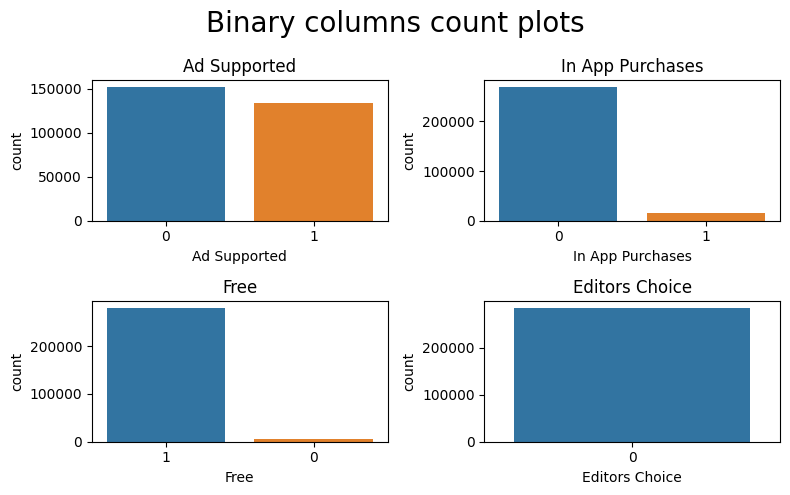

In [21]:
plot_binary(features_df)

In [22]:
# drop  'Editors Choice' column as all values are 0
features_df.drop('Editors Choice', axis=1, inplace=True)
features_df.head(10)

,Ad Supported,In App Purchases,Free
746547,0,0,1
698841,0,0,1
1815089,1,0,1
1314115,0,0,1
81454,0,0,1
1742673,0,0,1
1402040,1,0,1
657633,0,0,1
1317500,0,0,1
1230205,0,0,1


In [23]:
# count nulls in each column
features_df.isnull().sum()

Ad Supported        0
In App Purchases    0
Free                0
dtype: int64

### Centroid initilization with Kmean++

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
Y=features_df.to_numpy()
# Compute the Jaccard distance matrix
def jaccard_distance(x, y):
    intersection = np.sum(np.logical_and(x, y))
    union = np.sum(np.logical_or(x, y))
    jaccard_distance= 1 - intersection / union
    return jaccard_distance



distance_matrix = pairwise_distances(Y, metric=jaccard_distance)
# Cluster the data using DBSCAN
dbscan = DBSCAN(metric='precomputed')
labels=dbscan.fit(distance_matrix)

MemoryError: Unable to allocate 605. GiB for an array with shape (285047, 285047) and data type float64

### Evaluate with Silhouette Score

In [ ]:
print("Score: ",silhouette_score(Y, labels))

## Results